In [1]:
import pandas as pd
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import random
from objects import play, TackleAttemptDataset, TackleNetEnsemble, array_to_field_dataframe
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm
from matplotlib.colors import Normalize, LinearSegmentedColormap

colors = [(0.9, 0.9, 0.9), (1, 0, 0)]  # Grey to Red
custom_cmap = LinearSegmentedColormap.from_list("CustomReds", colors, N=256)
colors = [(0, 0, 1), (0.9, 0.9, 0.9), (1, 0, 0)]  # Blue to Grey to Red
custom_cmap_two_way = LinearSegmentedColormap.from_list('blue_to_grey_to_red', colors, N=256)
x_range = np.linspace(0, 10, 10)  # 100 points between 0 and 10
y_range = np.linspace(0, 54, 10)  # 100 points between 0 and 54
x_td1, y_td1 = np.meshgrid(x_range, y_range)
x_range = np.linspace(110, 120, 10)
x_td2, y_td2 = np.meshgrid(x_range, y_range)
x_range = np.linspace(0, 120, 10)
x_field, y_field = np.meshgrid(x_range, y_range)

tracking = pd.concat([pd.read_csv(f"data/nfl-big-data-bowl-2024/tracking_a_week_{week}.csv") for week in range(1, 10)])



/Users/nickbachelder/opt/anaconda3/envs/data-science/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
#########################
# Define Game and Play Id
game_id=2022110609
play_id=239
########################

play_object = play(game_id, play_id, tracking)
def_df = play_object.refine_tracking(frame_id = play_object.min_frame)["Defense"]
def_ids = def_df.nflId.unique()

# Define model

model = TackleNetEnsemble(num_models = 10, N = 3, nmix=5)
all_pred = play_object.get_plot_df(model = model)

  0%|          | 0/6 [00:00<?, ?it/s]

--------------------------------------------
right
nflId: 38577.0
Expected original EOP frame 1: 69.99769754094868 95% CI: [64.89946292060408, 74.08534587796828]
Expected with ommitted EOP frame 1: 70.02747125782614 95% CI: [65.1362713207359, 74.13145885716682
Expected contribution frame 1: -0.02977371687743897 95% CI: [-0.2850257705501377, 0.11957348456359611]
Expected SOI frame 1: 0.08308333333333333 95% CI: [0.0529875, 0.12046666666666667]


 17%|█▋        | 1/6 [00:00<00:04,  1.05it/s]

--------------------------------------------
--------------------------------------------
right
nflId: 41239.0
Expected original EOP frame 1: 69.99769754094868 95% CI: [64.89946292060408, 74.08534587796828]
Expected with ommitted EOP frame 1: 70.01704875334197 95% CI: [65.01759795488108, 74.09814910565947
Expected contribution frame 1: -0.019351212393280547 95% CI: [-0.2234200719300688, 0.10937184713470281]
Expected SOI frame 1: 0.09119999999999999 95% CI: [0.048558333333333335, 0.13001666666666667]


 33%|███▎      | 2/6 [00:01<00:03,  1.03it/s]

--------------------------------------------
--------------------------------------------
right
nflId: 43298.0


 50%|█████     | 3/6 [00:02<00:02,  1.03it/s]

Expected original EOP frame 1: 69.99769754094868 95% CI: [64.89946292060408, 74.08534587796828]
Expected with ommitted EOP frame 1: 70.0037037582156 95% CI: [64.88737271411664, 74.13031665488059
Expected contribution frame 1: -0.006006217266894964 95% CI: [-0.1469134767396362, 0.08952378423677346]
Expected SOI frame 1: 0.08746666666666666 95% CI: [0.0528625, 0.12320833333333334]
--------------------------------------------
--------------------------------------------
right
nflId: 43335.0
Expected original EOP frame 1: 69.99769754094868 95% CI: [64.89946292060408, 74.08534587796828]
Expected with ommitted EOP frame 1: 69.90222118341785 95% CI: [64.9160551783353, 73.89759143476346
Expected contribution frame 1: 0.09547635753083768 95% CI: [-0.03185100618120025, 0.27624474853075115]
Expected SOI frame 1: 0.09175 95% CI: [0.0533625, 0.12845833333333334]


 67%|██████▋   | 4/6 [00:04<00:02,  1.02s/it]

--------------------------------------------
--------------------------------------------
right
nflId: 47917.0
Expected original EOP frame 1: 69.99769754094868 95% CI: [64.89946292060408, 74.08534587796828]
Expected with ommitted EOP frame 1: 70.00630049877073 95% CI: [65.07305521478176, 74.12042790668613
Expected contribution frame 1: -0.00860295782203906 95% CI: [-0.2163281476136639, 0.13495481683440574]
Expected SOI frame 1: 0.08235 95% CI: [0.04812916666666667, 0.12055416666666668]


 83%|████████▎ | 5/6 [00:05<00:01,  1.07s/it]

--------------------------------------------
--------------------------------------------
right
nflId: 47939.0
Expected original EOP frame 1: 69.99769754094868 95% CI: [64.89946292060408, 74.08534587796828]
Expected with ommitted EOP frame 1: 69.9620204724216 95% CI: [65.25458236037323, 73.97167824809611
Expected contribution frame 1: 0.03567706852709307 95% CI: [-0.4186220959192212, 0.29812195137413866]
Expected SOI frame 1: 0.09298333333333333 95% CI: [0.052925, 0.1265375]


100%|██████████| 6/6 [00:06<00:00,  1.09s/it]

--------------------------------------------


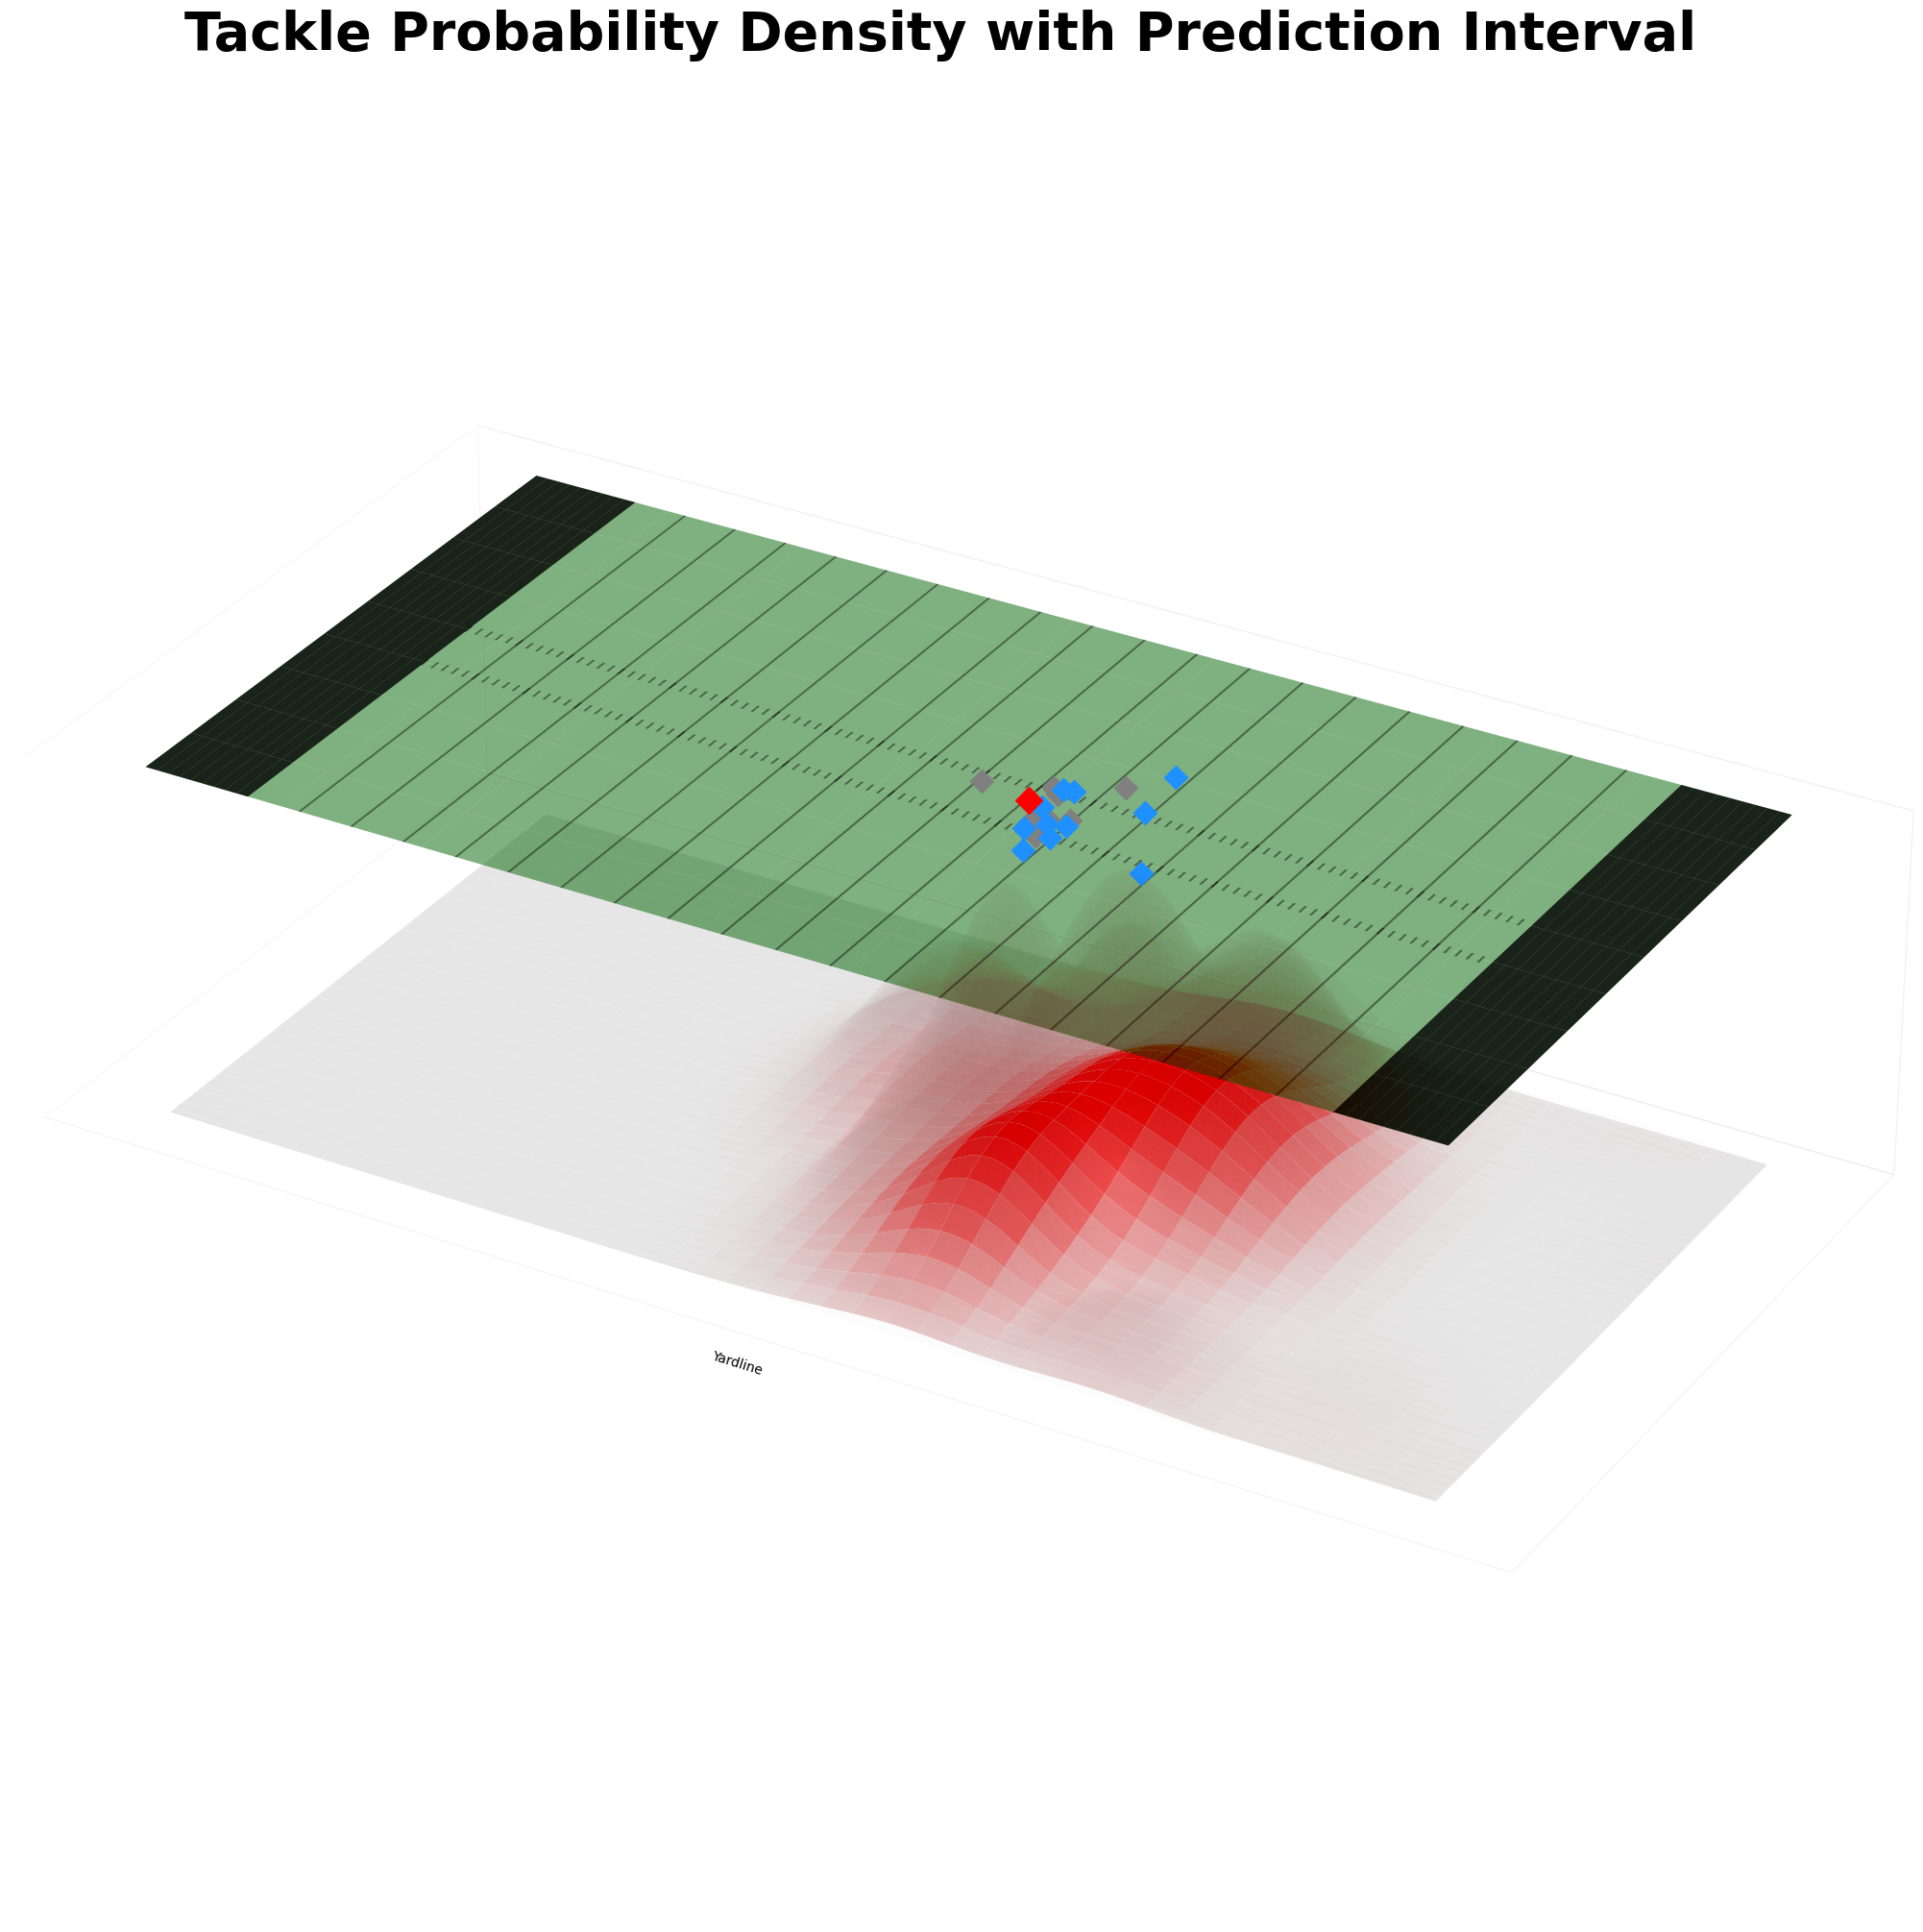

In [43]:
############################
# Define frame to be plotted
frame_id = 25
##########################

fig = plt.figure(figsize=(30, 20), constrained_layout=True)
ax = fig.add_subplot(projection='3d', computed_zorder=False)

tracking_now = tracking.query("gameId == @game_id & playId == @play_id & frameId == @frame_id")[['x', 'y', 'type']]
#tracking_now['x'] = 120 - tracking_now['x']
tracking_now_off = tracking_now.query("type == 'Offense'")
tracking_now_def = tracking_now.query("type == 'Defense'")
tracking_now_ball = tracking_now.query("type == 'Ball'")

dataframe_now = all_pred.query("(frameId == @frame_id) & (omit == 0)")
fx = sorted(dataframe_now['x'].unique())
fy = sorted(dataframe_now['y'].unique())
z, zerror_lower, zerror_upper = [], [], []

overall_max_z = np.max(all_pred.query("(omit == 0)").upper.values)

for y_val in fy:  # Reverse the order of y values
    row_data, error_lower_data, error_upper_data = [], [], []

    for x_val in fx:  # Reverse the order of x values
        subset = dataframe_now[(dataframe_now['x'] == x_val) & (dataframe_now['y'] == y_val)]
        row_data.append(subset['prob'].values[0])
        error_lower_data.append(subset['lower'].values[0])
        error_upper_data.append(subset['upper'].values[0])
    z.append(row_data)
    zerror_lower.append(error_lower_data)
    zerror_upper.append(error_upper_data)

#z = np.fliplr(z)
#zerror_lower = np.fliplr(zerror_lower)
#zerror_upper = np.fliplr(zerror_upper)

x, y = np.meshgrid(fx, fy)  # Reverse the order of x and y values
ax.cla()
ax.plot_surface(x, y, np.array(z), cmap=custom_cmap, alpha=1)
ax.plot_surface(x_field, y_field, np.full_like(np.zeros((10,10)), overall_max_z), color="green", alpha=0.5)
ax.plot_surface(x_td1, y_td1, np.full_like(np.zeros((10,10)), overall_max_z), color="black", alpha=0.8)
ax.plot_surface(x_td2, y_td2, np.full_like(np.zeros((10,10)), overall_max_z), color="black", alpha=0.8)

# tick marks
y_range = np.linspace(0, 54, 10) 
for yardline in range(15, 110, 5):
    x_range = np.linspace(yardline-0.1, yardline+0.1, 10)
    x_yard, y_yard = np.meshgrid(x_range, y_range)
    ax.plot_surface(x_yard, y_yard, np.full_like(np.zeros((10,10)), overall_max_z), color="black", alpha=0.5)
tick_1_y = (54/2) + (6.16/2)
tick_2_y = (54/2) - (6.16/2)
for tick in range(10, 110, 1):
    x_range = np.linspace(tick-0.1, tick+0.1, 10)
    for value in [tick_1_y, tick_2_y]:
        y_range = np.linspace(value-0.5, value+0.5, 10)
        x_yard, y_yard = np.meshgrid(x_range, y_range)
        ax.plot_surface(x_yard, y_yard, np.full_like(np.zeros((10,10)), overall_max_z), color="black", alpha=0.5)

ax.scatter(tracking_now_off['x'], tracking_now_off['y'], overall_max_z, depthshade=False, c='grey', marker='D', label='Tracking Points', s = 150, alpha = 1)
ax.scatter(tracking_now_def['x'], tracking_now_def['y'], overall_max_z, depthshade=False, c='dodgerblue', marker='D', label='Tracking Points', s = 150, alpha = 1)
ax.scatter(tracking_now_ball['x'], tracking_now_ball['y'], overall_max_z, depthshade=False, c='red', marker='D', label='Tracking Points', s = 200, alpha = 1)

ax.set_xlabel('Yardline')
ax.set_title(f'Tackle Probability Density with Prediction Interval', fontweight='bold', fontsize = 40)

for i in range(len(fy)):
    ax.plot_surface(x[i], y[i], np.array([zerror_upper[i], zerror_lower[i]]), color='red', alpha=0.01)

ax.set_box_aspect([2, 1, 0.5])
ax.grid(False)
ax.set_zlim([0, overall_max_z])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.w_xaxis.line.set_lw(0)
ax.w_yaxis.line.set_lw(0)
ax.w_zaxis.line.set_lw(0)

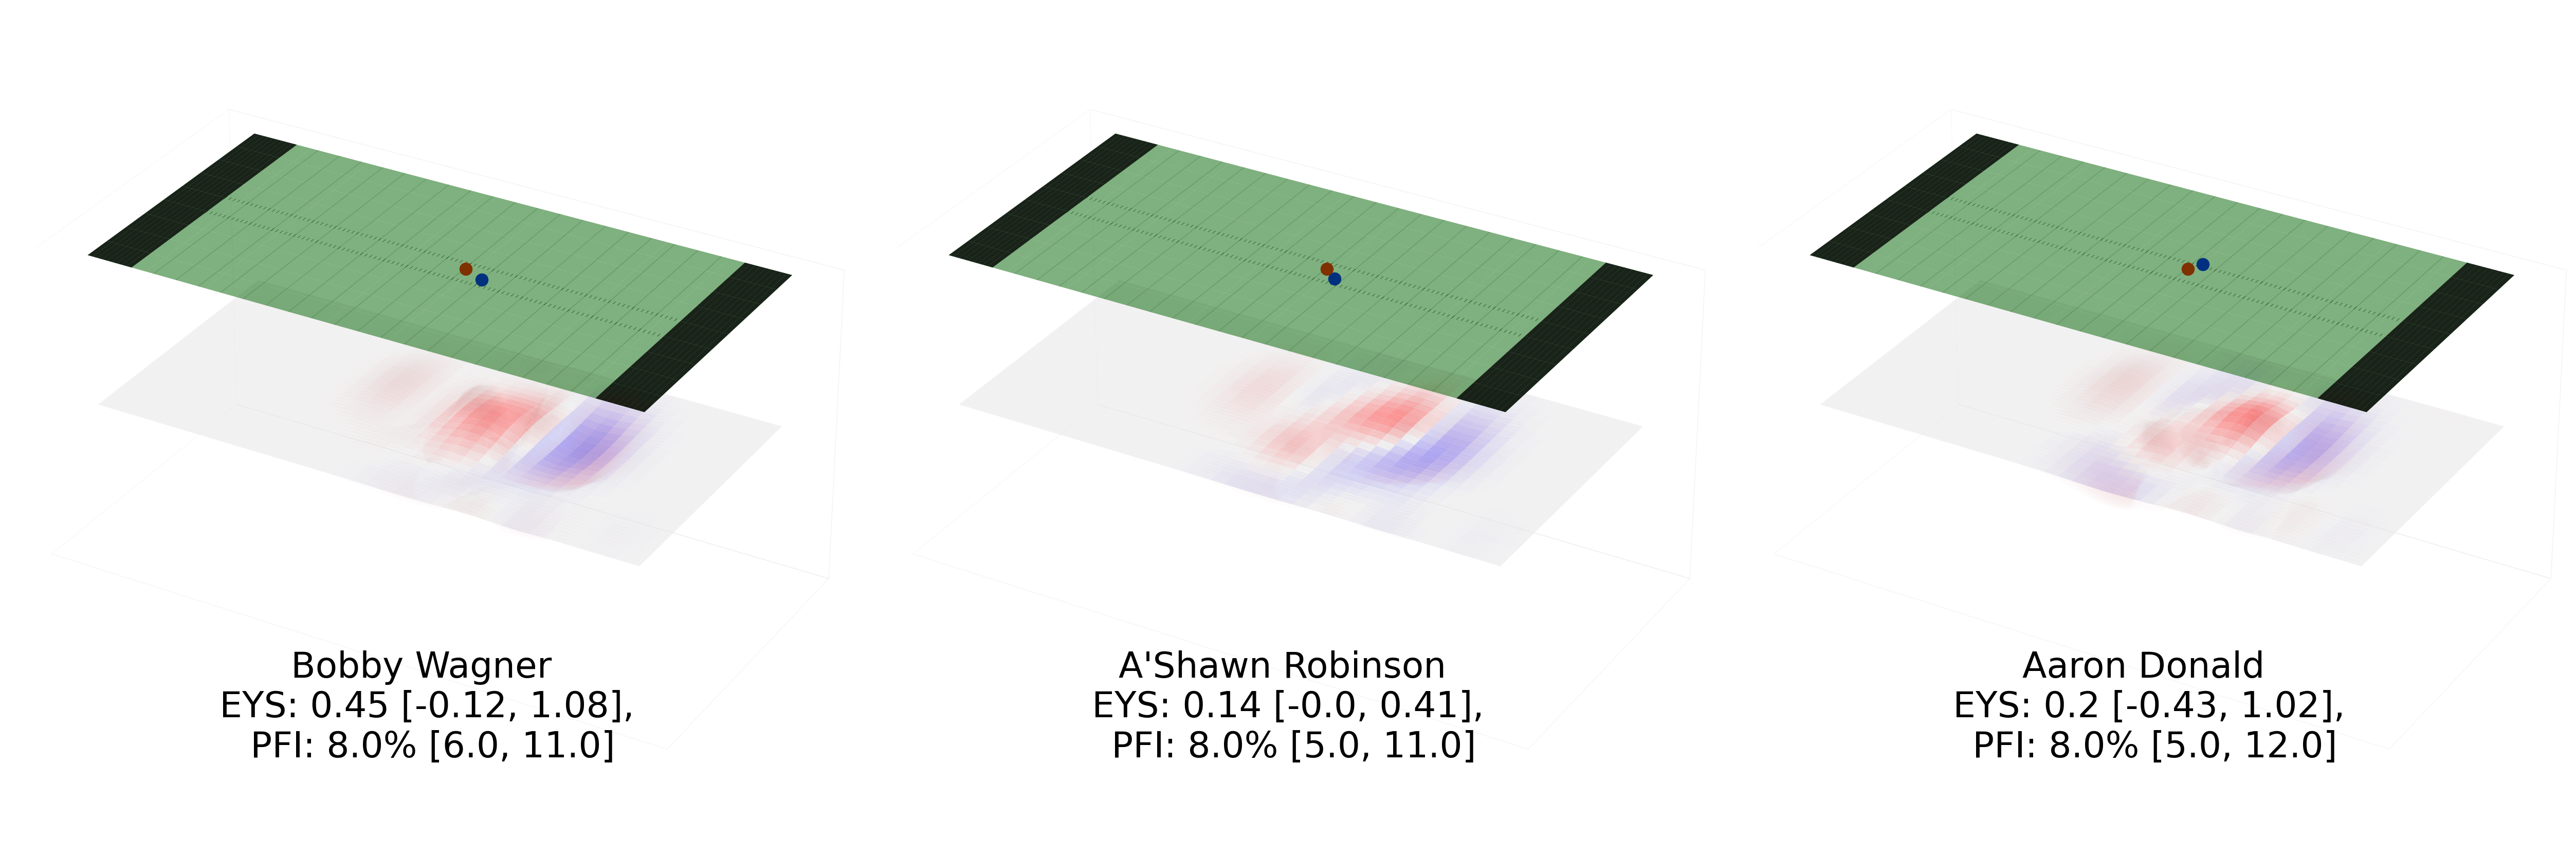

In [44]:
tracking_now = tracking.query("gameId == @game_id & playId == @play_id & frameId == @frame_id")[['displayName', 'nflId', 'x', 'y', 'type']]
tracking_now_def = tracking_now.query("type == 'Defense'")
tracking_now_ball = tracking_now.query("type == 'Ball'")
overall_max_z = np.max(all_pred.query("(omit != 0)").upper.values)
fig, axs = plt.subplots(1, 3,  figsize=(50, 20), subplot_kw={'projection': '3d', 'computed_zorder' : False}, constrained_layout=True)
axs = axs.flatten()
omit_values = play_object.get_closest_three_def_from_eop()


for ax, omit in zip(axs.flatten(), omit_values):
    ax.clear()

    dataframe_now = all_pred.query("(frameId == @frame_id) & (omit == @omit)")
    dataframe_now_metrics = dataframe_now.drop_duplicates().exp_contribution.values
    min_z = np.min(all_pred.query("(omit == @omit)").prob)
    max_z = np.max(all_pred.query("(omit == @omit)").prob)
    this_def_player = tracking_now_def.query("nflId == @omit")

    player_name = this_def_player.displayName.values[0]
    exp_contribution = np.round(dataframe_now.drop_duplicates().exp_contribution.values, 2)[0]
    upper_contribution = np.round(dataframe_now.drop_duplicates().upper_contribution.values, 2)[0]
    lower_contribution = np.round(dataframe_now.drop_duplicates().lower_contribution.values, 2)[0]
    exp_soi = np.round(dataframe_now.drop_duplicates().exp_soi.values, 2)[0]
    lower_soi = np.round(dataframe_now.drop_duplicates().lower_soi.values, 2)[0]
    upper_soi = np.round(dataframe_now.drop_duplicates().upper_soi.values, 2)[0]

    fx = sorted(dataframe_now['x'].unique())
    fy = sorted(dataframe_now['y'].unique())
    z, zerror_lower, zerror_upper = [], [], []

    for y_val in fy:
        row_data, error_lower_data, error_upper_data = [], [], []

        for x_val in fx:
            subset = dataframe_now[(dataframe_now['x'] == x_val) & (dataframe_now['y'] == y_val)]
            row_data.append(subset['prob'].values[0])
            error_lower_data.append(subset['lower'].values[0])
            error_upper_data.append(subset['upper'].values[0])

        z.append(row_data)
        zerror_lower.append(error_lower_data)
        zerror_upper.append(error_upper_data)
    
    #z = np.fliplr(z)
    #zerror_lower = np.fliplr(zerror_lower)
    #zerror_upper = np.fliplr(zerror_upper)

    x, y = np.meshgrid(fx, fy)
    ax.plot_surface(x, y, np.array(z), cmap=custom_cmap_two_way, alpha=0.5, label=f'Omit={omit}', norm = Normalize(vmin=-max_z, vmax=max_z))

    # tick marks
    y_range = np.linspace(0, 54, 10) 
    for yardline in range(15, 110, 5):
        x_range = np.linspace(yardline-0.1, yardline+0.1, 10)
        x_yard, y_yard = np.meshgrid(x_range, y_range)
        ax.plot_surface(x_yard, y_yard, np.full_like(np.zeros((10,10)), overall_max_z), color="grey", alpha=0.3)
    tick_1_y = (54/2) + (6.16/2)
    tick_2_y = (54/2) - (6.16/2)
    for tick in range(10, 110, 1):
        x_range = np.linspace(tick-0.1, tick+0.1, 10)
        for value in [tick_1_y, tick_2_y]:
            y_range = np.linspace(value-0.5, value+0.5, 10)
            x_yard, y_yard = np.meshgrid(x_range, y_range)
            ax.plot_surface(x_yard, y_yard, np.full_like(np.zeros((10,10)), overall_max_z), color="black", alpha=0.5)

    ax.scatter(this_def_player['x'], this_def_player['y'], overall_max_z+overall_max_z/10000, c = "blue", cmap=custom_cmap_two_way, marker='o', 
                label='Defense', alpha=1, s = 300, norm = Normalize(vmin=-5, vmax=5))
    ax.scatter(tracking_now_ball['x'], tracking_now_ball['y'], overall_max_z+overall_max_z/10000, c='red', marker='o', label='Ball Carrier', alpha=1,s=300)
    ax.plot_surface(x_field, y_field, np.full_like(np.zeros((10,10)), overall_max_z), color="green", alpha=0.5)
    ax.plot_surface(x_td1, y_td1, np.full_like(np.zeros((10,10)), overall_max_z), color="black", alpha=0.8)
    ax.plot_surface(x_td2, y_td2, np.full_like(np.zeros((10,10)), overall_max_z), color="black", alpha=0.8)

    ax.set_title(f'{player_name} \n EYS: {exp_contribution} [{lower_contribution}, {upper_contribution}], \n PFI: {exp_soi*100}% [{lower_soi*100}, {upper_soi*100}]', fontsize=50, pad=20, loc='center', y=0.1)

    for i in range(len(fy)):
        ax.plot_surface(x[i], y[i], np.array([zerror_upper[i], zerror_lower[i]]), color='red', alpha=0.01)

    ax.set_box_aspect([2, 1, 1])
    ax.grid(False)
    ax.set_zlim([-overall_max_z, overall_max_z])

    # Hide x, y, and z axis ticks and lines
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.w_xaxis.line.set_lw(0)
    ax.w_yaxis.line.set_lw(0)
    ax.w_zaxis.line.set_lw(0)